## This is just a simple workbook for me to work on a variety of data skills in python

## Loading Data

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


path = "C:/Users/helle/Downloads/Walmart.csv"

data = pd.read_csv(path)

print(data.head())

   transaction_id  customer_id  product_id product_name     category  \
0               1         2824         843       Fridge  Electronics   
1               2         1409         135           TV  Electronics   
2               3         5506         391       Fridge  Electronics   
3               4         5012         710   Smartphone  Electronics   
4               5         4657         116       Laptop  Electronics   

   quantity_sold  unit_price transaction_date  store_id   store_location  ...  \
0              3      188.46  3/31/2024 21:46         3        Miami, FL  ...   
1              4     1912.04  7/28/2024 12:45         5       Dallas, TX  ...   
2              4     1377.75   6/10/2024 4:55         1  Los Angeles, CA  ...   
3              5      182.31   8/15/2024 1:03         5        Miami, FL  ...   
4              3      499.28   9/13/2024 0:45         6      Chicago, IL  ...   

   customer_loyalty_level  payment_method  promotion_applied  \
0               

      product_id     product_name  total_sold
226          155           Fridge          22
1851         564       Smartphone          20
1734         535           Fridge          18
2575         740       Headphones          17
3487         961           Camera          17
...          ...              ...         ...
1556         490           Laptop           1
3076         857  Washing Machine           1
1554         489  Washing Machine           1
3078         858           Laptop           1
3630         999           Tablet           1

[3631 rows x 3 columns]


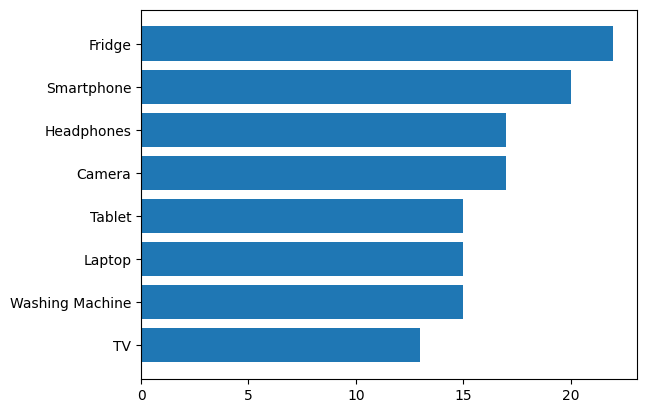

In [101]:
## Highest volume product

volume_by_product =\
    data\
    .groupby(['product_id', 'product_name'])\
    .agg({'quantity_sold': 'sum'})
volume_by_product.reset_index(inplace = True)

volume_by_product = volume_by_product.rename(columns = {'quantity_sold': 'total_sold'})


print(volume_by_product.sort_values('total_sold', ascending = False))

## Create simple horizontal bar chart

volume_by_product = volume_by_product.rename(columns = {'quantity_sold': 'total_sold'})
sorted_products =\
    volume_by_product.sort_values('total_sold', ascending = False).reset_index(drop = True)
plt.barh(sorted_products['product_name'], sorted_products['total_sold'])
plt.gca().invert_yaxis()
plt.show()

## Movies Data


In [205]:
## Import and explore data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "C:/Users/helle/Downloads/IMDB_Movies_Dataset.csv"

movies = pd.read_csv(file_path)

print(movies)


      Unnamed: 0                                       Title  Average Rating  \
0              0                    The Shawshank Redemption             9.3   
1              1  Attack on Titan the Movie: The Last Attack             9.3   
2              2                               The Godfather             9.2   
3              3                              Hababam Sinifi             9.2   
4              4         Ramayana: The Legend of Prince Rama             9.2   
...          ...                                         ...             ...   
4984         495                                La comunidad             7.2   
4985         496                           The House of Fear             7.2   
4986         497                              Kurôzu zero II             7.2   
4987         498                               La cage dorée             7.2   
4988         499                                     Chingoo             7.2   

                                Directo

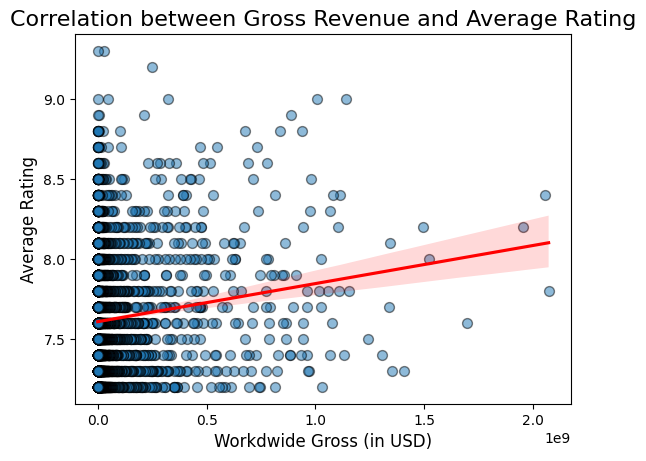

In [227]:
## lets look at a correlation between budget and rating
## keep just the columns we care about

cols_keep =\
    ['Budget', 'Average Rating', 'Country of Origin', 'Worldwide Gross']

## clean data and convert worldwide gross to numeric data type

movies = movies[movies['Worldwide Gross'].notnull()]
movies['Worldwide Gross'] = movies['Worldwide Gross'].replace({'[$]': '', ',': '', ' \(estimated\)': ''}, regex=True)
movies['Worldwide Gross'] = pd.to_numeric(movies['Worldwide Gross'], errors='coerce')
movies = movies.sort_values('Worldwide Gross', ascending = False)
movies = movies[movies['Worldwide Gross'] > 0]


sns.regplot(data = movies,
            x = 'Worldwide Gross',
            y = 'Average Rating',
           line_kws = {'color': 'red'},
           scatter_kws = {'s': 50, 'alpha': 0.5, 'edgecolor': 'black'})

## Add titles and labels
plt.title('Correlation between Gross Revenue and Average Rating', fontsize = 16)
plt.xlabel('Workdwide Gross (in USD)', fontsize = 12)
plt.ylabel('Average Rating', fontsize = 12)




plt.show()
